In [1]:
import pandas as pd
import numpy as np
import json
import gmaps
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import requests
from scipy.stats import linregress
import matplotlib.cm as cm
from scipy.stats import norm
import statistics

#from census import Census

import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
path = "../CSV statistics/QB_2020.csv"
qb2020 = pd.read_csv(path)
qb2020['YDS'] = qb2020['YDS'].str.replace(',', '').astype(float)
qb2020

,Rank,Player,CMP,ATT,PCT,YDS,Y/A,TD,INT,SACKS,ATT.1,YDS.1,TD.1,FL,G,FPTS,FPTS/G,OWN
0,1.0,Josh Allen (BUF),396.0,572.0,69.2,4544.0,7.9,37.0,10.0,26.0,102.0,421,8.0,6.0,16.0,405.7,25.4,99.8%
1,2.0,Kyler Murray (ARI),375.0,558.0,67.2,3971.0,7.1,26.0,12.0,27.0,133.0,819,11.0,4.0,16.0,390.7,24.4,99.6%
2,3.0,Aaron Rodgers (GB),372.0,526.0,70.7,4299.0,8.2,48.0,5.0,20.0,38.0,149,3.0,2.0,16.0,387.6,24.2,96.3%
3,4.0,Patrick Mahomes II (KC),390.0,588.0,66.3,4740.0,8.1,38.0,6.0,22.0,62.0,308,2.0,2.0,15.0,380.3,25.4,99.8%
4,5.0,Deshaun Watson (HOU),382.0,544.0,70.2,4823.0,8.9,33.0,7.0,49.0,90.0,444,3.0,3.0,16.0,376.4,23.5,47.7%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,143.0,Matt Schaub (FA),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-4,0.0,0.0,1.0,-0.4,-0.4,0.0%
143,144.0,Nate Sudfeld (SF),5.0,12.0,41.7,32.0,2.7,0.0,1.0,2.0,2.0,12,0.0,1.0,1.0,-0.5,-0.5,0.0%
144,145.0,Tim Boyle (DET),0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,-9,0.0,0.0,8.0,-0.9,-0.1,0.1%
145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
path = "../CSV statistics/QB_2019.csv"
qb2019 = pd.read_csv(path)
qb2019['YDS'] = qb2019['YDS'].str.replace(',', '').astype(float)
qb2019 = qb2019.dropna().reset_index(drop=True)
qb2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rank    130 non-null    float64
 1   Player  130 non-null    object 
 2   CMP     130 non-null    float64
 3   ATT     130 non-null    float64
 4   PCT     130 non-null    float64
 5   YDS     130 non-null    float64
 6   Y/A     130 non-null    float64
 7   TD      130 non-null    float64
 8   INT     130 non-null    float64
 9   SACKS   130 non-null    float64
 10  ATT.1   130 non-null    float64
 11  YDS.1   130 non-null    object 
 12  TD.1    130 non-null    float64
 13  FL      130 non-null    float64
 14  G       130 non-null    float64
 15  FPTS    130 non-null    float64
 16  FPTS/G  130 non-null    float64
 17  OWN     130 non-null    object 
dtypes: float64(15), object(3)
memory usage: 18.4+ KB


In [4]:
path = "../CSV statistics/QB_2018.csv"
qb2018 = pd.read_csv(path)
qb2018['YDS'] = qb2018['YDS'].str.replace(',', '').astype(float)
qb2018

,Rank,Player,CMP,ATT,PCT,YDS,Y/A,TD,INT,SACKS,ATT.1,YDS.1,TD.1,FL,G,FPTS,FPTS/G,OWN
0,1.0,Patrick Mahomes II (KC),383.0,580.0,66.0,5097.0,8.8,50.0,12.0,26.0,60.0,272.0,2.0,2.0,16.0,417.0,26.1,99.8%
1,2.0,Matt Ryan (ATL),422.0,608.0,69.4,4924.0,8.1,35.0,7.0,42.0,33.0,125.0,3.0,5.0,16.0,354.5,22.2,42.1%
2,3.0,Ben Roethlisberger (PIT),452.0,675.0,67.0,5129.0,7.6,34.0,16.0,24.0,31.0,98.0,3.0,2.0,16.0,341.5,21.3,24.8%
3,4.0,Deshaun Watson (HOU),345.0,505.0,68.3,4165.0,8.2,26.0,9.0,62.0,99.0,551.0,5.0,3.0,16.0,331.9,20.7,47.7%
4,5.0,Andrew Luck (FA),430.0,639.0,67.3,4593.0,7.2,39.0,15.0,18.0,46.0,148.0,0.0,1.0,16.0,327.6,20.5,0.3%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,153.0,Jacoby Brissett (MIA),2.0,4.0,50.0,2.0,0.5,0.0,0.0,0.0,7.0,-7.0,0.0,0.0,4.0,-0.6,-0.2,0.3%
153,154.0,Geno Smith (SEA),1.0,4.0,25.0,8.0,2.0,0.0,0.0,1.0,8.0,2.0,0.0,1.0,5.0,-1.5,-0.3,0.1%
154,155.0,Kyle Lauletta (CLE),0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-2.0,0.0,0.0,2.0,-2.2,-1.1,0.0%
155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:

mask = qb2020.G >= 10 
qb2020 = qb2020[mask]
qb2020.reset_index(drop=True)

,Rank,Player,CMP,ATT,PCT,YDS,Y/A,TD,INT,SACKS,ATT.1,YDS.1,TD.1,FL,G,FPTS,FPTS/G,OWN
0,1.0,Josh Allen (BUF),396.0,572.0,69.2,4544.0,7.9,37.0,10.0,26.0,102.0,421,8.0,6.0,16.0,405.7,25.4,99.8%
1,2.0,Kyler Murray (ARI),375.0,558.0,67.2,3971.0,7.1,26.0,12.0,27.0,133.0,819,11.0,4.0,16.0,390.7,24.4,99.6%
2,3.0,Aaron Rodgers (GB),372.0,526.0,70.7,4299.0,8.2,48.0,5.0,20.0,38.0,149,3.0,2.0,16.0,387.6,24.2,96.3%
3,4.0,Patrick Mahomes II (KC),390.0,588.0,66.3,4740.0,8.1,38.0,6.0,22.0,62.0,308,2.0,2.0,15.0,380.3,25.4,99.8%
4,5.0,Deshaun Watson (HOU),382.0,544.0,70.2,4823.0,8.9,33.0,7.0,49.0,90.0,444,3.0,3.0,16.0,376.4,23.5,47.7%
5,6.0,Russell Wilson (SEA),384.0,558.0,68.8,4212.0,7.5,40.0,13.0,47.0,83.0,513,2.0,4.0,16.0,372.6,23.3,96.2%
6,7.0,Ryan Tannehill (TEN),315.0,481.0,65.5,3819.0,7.9,33.0,7.0,24.0,43.0,266,7.0,1.0,16.0,350.8,21.9,87.8%
7,8.0,Tom Brady (TB),401.0,610.0,65.7,4633.0,7.6,40.0,12.0,21.0,30.0,6,3.0,1.0,16.0,350.0,21.9,93.8%
8,9.0,Justin Herbert (LAC),396.0,595.0,66.6,4336.0,7.3,31.0,10.0,32.0,55.0,234,5.0,1.0,15.0,342.8,22.9,95.0%
9,10.0,Lamar Jackson (BAL),242.0,376.0,64.4,2757.0,7.3,26.0,9.0,29.0,159.0,"1,005",7.0,4.0,15.0,341.7,22.8,97.9%


In [6]:
qb2020.describe()

,Rank,CMP,ATT,PCT,YDS,Y/A,TD,INT,SACKS,ATT.1,TD.1,FL,G,FPTS,FPTS/G
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,18.264706,288.941176,438.823529,64.367647,3233.852941,7.170588,22.264706,9.000000,26.529412,53.470588,3.382353,2.794118,14.088235,252.517647,17.535294
std,11.418509,103.271616,149.756868,8.099372,1212.312944,1.113697,11.917161,3.490246,11.495019,35.840755,3.025294,1.887429,2.301089,97.927145,5.251025
min,1.000000,2.000000,8.000000,25.000000,17.000000,2.100000,0.000000,0.000000,2.000000,9.000000,0.000000,0.000000,10.000000,20.600000,1.900000
25%,9.250000,223.250000,365.000000,64.250000,2482.750000,6.750000,13.000000,7.000000,19.000000,30.000000,1.250000,1.000000,12.000000,166.000000,15.250000
50%,17.500000,310.000000,483.500000,65.750000,3648.000000,7.300000,24.000000,10.000000,25.000000,41.000000,3.000000,2.500000,15.000000,254.650000,17.700000
75%,26.500000,374.250000,550.000000,67.900000,4201.250000,7.700000,32.500000,11.000000,32.000000,62.750000,4.750000,4.000000,16.000000,342.525000,21.900000
max,50.000000,407.000000,626.000000,72.700000,4823.000000,8.900000,48.000000,15.000000,50.000000,159.000000,12.000000,8.000000,16.000000,405.700000,25.400000


In [7]:
inputs = ['CMP','ATT','Y/A','INT']
feature = qb2020[inputs]
target = qb2020['TD']

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     TD   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     22.02
Date:                Tue, 10 Aug 2021   Prob (F-statistic):           1.94e-08
Time:                        16:07:39   Log-Likelihood:                -108.26
No. Observations:                  34   AIC:                             226.5
Df Residuals:                      29   BIC:                             234.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.3149      8.026     -0.911      0.370     -23.731       9.101
CMP            0.1273      0.095      1.337      0.192      -0.067       0.322
ATT           -0.0152      0.067     -0.226      0.823      -0.153       0.122
Y/A            0.9697      1.280      0.758      0.455      -1.648       3.587
INT           -0.8317      0.464     -1.794      0.083      -1.780       0.116
==============================================================================
Omnibus:                        0.292   Durbin-Watson:                   1.531
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.476
Skew:                           0.066   Prob(JB):                        0.788
Kurtosis:                       2.435   Cond. No.                     4.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-8-00cd8a6b84d3>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


Josh Allen (BUF)
Kyler Murray (ARI)
Aaron Rodgers (GB)
Patrick Mahomes II (KC)
Deshaun Watson (HOU)
Russell Wilson (SEA)
Ryan Tannehill (TEN)
Tom Brady (TB)
Justin Herbert (LAC)
Lamar Jackson (BAL)
Kirk Cousins (MIN)
Matt Ryan (ATL)
Derek Carr (LV)
Ben Roethlisberger (PIT)
Matthew Stafford (LAR)
Cam Newton (NE)
Baker Mayfield (CLE)
Jared Goff (DET)
Teddy Bridgewater (DEN)
Philip Rivers (FA)
Drew Brees (FA)
Carson Wentz (IND)
Drew Lock (DEN)
Daniel Jones (NYG)
Joe Burrow (CIN)
Player #25 was not added
Mitchell Trubisky (BUF)
Ryan Fitzpatrick (WAS)
Taysom Hill (NO)
Sam Darnold (CAR)
Andy Dalton (CHI)
Tua Tagovailoa (MIA)
Player #32 was not added
Nick Mullens (PHI)


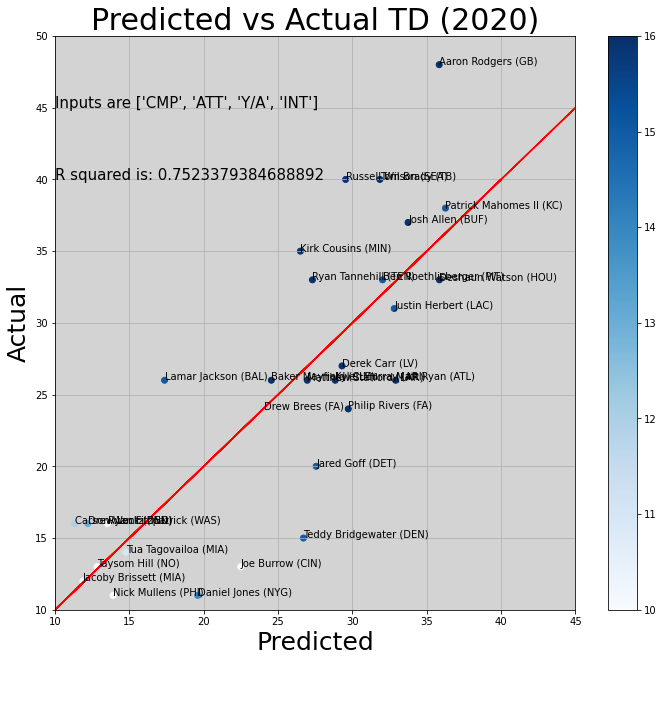

In [8]:
plt.figure(figsize=(10,10))
weight = qb2020.G
plt.scatter(results.fittedvalues, qb2020.TD,marker="o",c= weight,cmap='Blues')

plt.xlim(10,45)
plt.ylim(10,50)
plt.xlabel("Predicted",fontsize=25)
plt.ylabel("Actual",fontsize=25)
plt.title("Predicted vs Actual TD (2020)",fontsize=30)
plt.plot(qb2020.TD, qb2020.TD,color='red')
plt.tight_layout()
plt.annotate(f'R squared is: {results.rsquared}',(10,40),fontsize=15)
plt.annotate(f'Inputs are {inputs}',(10,45),fontsize=15)
plt.grid()
plt.colorbar()
ax = plt.axes()
ax.set(facecolor='lightgray')

n = qb2020.Player

for i,txt in enumerate(n):
    try:
        print(qb2020.Player[i])
        plt.annotate(txt, (results.fittedvalues[i], qb2020.TD[i]))
    except:
        print(f'Player #{i} was not added')
plt.tight_layout()
plt.show()

In [9]:
predicted = results.fittedvalues
actual = qb2020.TD
name = qb2020.Player
games = qb2020.G
difference  = qb2020.TD - results.fittedvalues
qbDict = {'Name':name,'Games':games,'Predicted':predicted,'Actual':actual,'Difference':difference}
predDf = pd.DataFrame(qbDict)

In [10]:
predDf.sort_values('Difference',ascending=False)

,Name,Games,Predicted,Actual,Difference
2,Aaron Rodgers (GB),16.0,35.836951,48.0,12.163049
5,Russell Wilson (SEA),16.0,29.546128,40.0,10.453872
9,Lamar Jackson (BAL),15.0,17.369775,26.0,8.630225
10,Kirk Cousins (MIN),16.0,26.505095,35.0,8.494905
7,Tom Brady (TB),16.0,31.849066,40.0,8.150934
6,Ryan Tannehill (TEN),16.0,27.311615,33.0,5.688385
49,Jacoby Brissett (MIA),11.0,-5.145454,0.0,5.145454
21,Carson Wentz (IND),12.0,11.338605,16.0,4.661395
22,Drew Lock (DEN),13.0,12.211146,16.0,3.788854
0,Josh Allen (BUF),16.0,33.743763,37.0,3.256237


In [11]:
inputs = ['CMP','ATT','Y/A','INT']
feature = qb2019[inputs]
target = qb2019['TD']

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     TD   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     450.9
Date:                Tue, 10 Aug 2021   Prob (F-statistic):           3.20e-73
Time:                        16:07:39   Log-Likelihood:                -305.03
No. Observations:                 130   AIC:                             620.1
Df Residuals:                     125   BIC:                             634.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1696      0.318     -0.533      0.595      -0.799       0.460
CMP            0.1577      0.027      5.759      0.000       0.104       0.212
ATT           -0.0539      0.018     -2.950      0.004      -0.090      -0.018
Y/A            0.0461      0.099      0.468      0.641      -0.149       0.241
INT           -0.0761      0.093     -0.819      0.414      -0.260       0.108
==============================================================================
Omnibus:                       80.977   Durbin-Watson:                   1.344
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1033.584
Skew:                           1.795   Prob(JB):                    3.63e-225
Kurtosis:                      16.339   Cond. No.                         420.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
predicted = results.fittedvalues
actual = qb2019.TD
name = qb2019.Player
games = qb2019.G
difference  = qb2019.TD - results.fittedvalues
qbDict = {'Name':name,'Games':games,'Predicted':predicted,'Actual':actual,'Difference':difference}
predDf = pd.DataFrame(qbDict)
predDf.sort_values('Difference',ascending=False)

,Name,Games,Predicted,Actual,Difference
0,Lamar Jackson (BAL),15.0,19.935708,36.0,16.064292
2,Jameis Winston (NO),16.0,24.149827,33.0,8.850173
20,Ryan Tannehill (TEN),12.0,16.117549,22.0,5.882451
28,Matthew Stafford (LAR),8.0,13.669803,19.0,5.330197
3,Russell Wilson (SEA),16.0,25.815002,31.0,5.184998
...,...,...,...,...,...
14,Philip Rivers (FA),16.0,28.354566,23.0,-5.354566
12,Jared Goff (DET),16.0,27.386062,22.0,-5.386062
25,Mitchell Trubisky (BUF),15.0,22.981045,17.0,-5.981045
33,Joe Flacco (PHI),8.0,12.634246,6.0,-6.634246


In [13]:
path = "../CSV statistics/QB_2018.csv"
qb2018 = pd.read_csv(path)
qb2018['YDS'] = qb2018['YDS'].str.replace(',', '').astype(float)

path = "../CSV statistics/QB_2019.csv"
qb2019 = pd.read_csv(path)
qb2019['YDS'] = qb2019['YDS'].str.replace(',', '').astype(float)

path = "../CSV statistics/QB_2020.csv"
qb2020 = pd.read_csv(path)
qb2020['YDS'] = qb2020['YDS'].str.replace(',', '').astype(float)


In [14]:
qbAll = qb2020.merge(qb2019,on='Player',how='left',suffixes=('_2020','_2019'))
qbAll = qbAll.merge(qb2018,on='Player',how='left',suffixes=(None,'_2018'))

qbAll.dropna().reset_index(drop=True)
#qbAll = pd.merge(pd.merge(qb2020,qb2019,on='Player', suffixes=['_2020','_2019']),qb2018,on='Player',suffixes=[None,'_2018'])


,Rank_2020,Player,CMP_2020,ATT_2020,PCT_2020,YDS_2020,Y/A_2020,TD_2020,INT_2020,SACKS_2020,...,INT,SACKS,ATT.1,YDS.1,TD.1,FL,G,FPTS,FPTS/G,OWN
0,1.0,Josh Allen (BUF),396.0,572.0,69.2,4544.0,7.9,37.0,10.0,26.0,...,12.0,28.0,89.0,631.0,8.0,2.0,12.0,208.1,17.3,99.8%
1,2.0,Kyler Murray (ARI),375.0,558.0,67.2,3971.0,7.1,26.0,12.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.6%
2,3.0,Aaron Rodgers (GB),372.0,526.0,70.7,4299.0,8.2,48.0,5.0,20.0,...,2.0,49.0,43.0,269.0,2.0,3.0,16.0,312.5,19.5,96.3%
3,4.0,Patrick Mahomes II (KC),390.0,588.0,66.3,4740.0,8.1,38.0,6.0,22.0,...,12.0,26.0,60.0,272.0,2.0,2.0,16.0,417.0,26.1,99.8%
4,5.0,Deshaun Watson (HOU),382.0,544.0,70.2,4823.0,8.9,33.0,7.0,49.0,...,9.0,62.0,99.0,551.0,5.0,3.0,16.0,331.9,20.7,47.7%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,140.0,Brett Hundley (IND),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1%
114,141.0,Trevor Siemian (NO),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0%
115,143.0,Matt Schaub (FA),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.6,0.2,0.0%
116,144.0,Nate Sudfeld (SF),5.0,12.0,41.7,32.0,2.7,0.0,1.0,2.0,...,0.0,0.0,2.0,-2.0,0.0,0.0,2.0,4.7,2.4,0.0%


In [15]:
#pd.set_option('display.max_rows','None')
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

qbAll = qbAll.drop(columns=['OWN_2020'])
qbAll = qbAll.drop(columns=['OWN_2019'])
qbAll = qbAll.drop(columns=['OWN'])

qbAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 152
Data columns (total 49 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank_2020    145 non-null    float64
 1   Player       145 non-null    object 
 2   CMP_2020     145 non-null    float64
 3   ATT_2020     145 non-null    float64
 4   PCT_2020     145 non-null    float64
 5   YDS_2020     145 non-null    float64
 6   Y/A_2020     145 non-null    float64
 7   TD_2020      145 non-null    float64
 8   INT_2020     145 non-null    float64
 9   SACKS_2020   145 non-null    float64
 10  ATT.1_2020   145 non-null    float64
 11  YDS.1_2020   145 non-null    object 
 12  TD.1_2020    145 non-null    float64
 13  FL_2020      145 non-null    float64
 14  G_2020       145 non-null    float64
 15  FPTS_2020    145 non-null    float64
 16  FPTS/G_2020  145 non-null    float64
 17  Rank_2019    142 non-null    float64
 18  CMP_2019     142 non-null    float64
 19  ATT_2019

In [16]:
qbAll.fillna(np.nan)

,Rank_2020,Player,CMP_2020,ATT_2020,PCT_2020,YDS_2020,Y/A_2020,TD_2020,INT_2020,SACKS_2020,ATT.1_2020,YDS.1_2020,TD.1_2020,FL_2020,G_2020,FPTS_2020,FPTS/G_2020,Rank_2019,CMP_2019,ATT_2019,PCT_2019,YDS_2019,Y/A_2019,TD_2019,INT_2019,SACKS_2019,ATT.1_2019,YDS.1_2019,TD.1_2019,FL_2019,G_2019,FPTS_2019,FPTS/G_2019,Rank,CMP,ATT,PCT,YDS,Y/A,TD,INT,SACKS,ATT.1,YDS.1,TD.1,FL,G,FPTS,FPTS/G
0,1.0,Josh Allen (BUF),396.0,572.0,69.2,4544.0,7.9,37.0,10.0,26.0,102.0,421,8.0,6.0,16.0,405.7,25.4,6.0,271.0,461.0,58.8,3089.0,6.7,20.0,9.0,38.0,109.0,510,9.0,4.0,16.0,297.5,18.6,21.0,169.0,320.0,52.8,2074.0,6.5,10.0,12.0,28.0,89.0,631.0,8.0,2.0,12.0,208.1,17.3
1,2.0,Kyler Murray (ARI),375.0,558.0,67.2,3971.0,7.1,26.0,12.0,27.0,133.0,819,11.0,4.0,16.0,390.7,24.4,7.0,349.0,542.0,64.4,3722.0,6.9,20.0,12.0,48.0,93.0,544,4.0,2.0,16.0,297.3,18.6,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,Aaron Rodgers (GB),372.0,526.0,70.7,4299.0,8.2,48.0,5.0,20.0,38.0,149,3.0,2.0,16.0,387.6,24.2,10.0,353.0,569.0,62.0,4002.0,7.0,26.0,4.0,36.0,46.0,183,1.0,4.0,16.0,282.3,17.6,6.0,372.0,597.0,62.3,4442.0,7.4,25.0,2.0,49.0,43.0,269.0,2.0,3.0,16.0,312.5,19.5
3,4.0,Patrick Mahomes II (KC),390.0,588.0,66.3,4740.0,8.1,38.0,6.0,22.0,62.0,308,2.0,2.0,15.0,380.3,25.4,8.0,319.0,484.0,65.9,4031.0,8.3,26.0,5.0,17.0,43.0,218,2.0,2.0,14.0,291.9,20.9,1.0,383.0,580.0,66.0,5097.0,8.8,50.0,12.0,26.0,60.0,272.0,2.0,2.0,16.0,417.0,26.1
4,5.0,Deshaun Watson (HOU),382.0,544.0,70.2,4823.0,8.9,33.0,7.0,49.0,90.0,444,3.0,3.0,16.0,376.4,23.5,5.0,333.0,495.0,67.3,3852.0,7.8,26.0,12.0,44.0,82.0,413,7.0,3.0,15.0,332.5,22.2,4.0,345.0,505.0,68.3,4165.0,8.2,26.0,9.0,62.0,99.0,551.0,5.0,3.0,16.0,331.9,20.7
5,6.0,Russell Wilson (SEA),384.0,558.0,68.8,4212.0,7.5,40.0,13.0,47.0,83.0,513,2.0,4.0,16.0,372.6,23.3,4.0,341.0,516.0,66.1,4110.0,8.0,31.0,5.0,48.0,75.0,342,3.0,2.0,16.0,333.5,20.8,9.0,280.0,427.0,65.6,3448.0,8.1,35.0,7.0,51.0,67.0,376.0,0.0,2.0,16.0,298.9,18.7
6,7.0,Ryan Tannehill (TEN),315.0,481.0,65.5,3819.0,7.9,33.0,7.0,24.0,43.0,266,7.0,1.0,16.0,350.8,21.9,21.0,201.0,286.0,70.3,2742.0,9.6,22.0,6.0,31.0,43.0,185,4.0,3.0,12.0,230.2,19.2,30.0,176.0,274.0,64.2,1979.0,7.2,17.0,9.0,35.0,32.0,145.0,0.0,4.0,11.0,142.5,13.0
7,8.0,Tom Brady (TB),401.0,610.0,65.7,4633.0,7.6,40.0,12.0,21.0,30.0,6,3.0,1.0,16.0,350.0,21.9,12.0,373.0,613.0,60.8,4057.0,6.6,24.0,8.0,27.0,26.0,34,3.0,1.0,16.0,271.6,17.0,14.0,375.0,570.0,65.8,4355.0,7.6,29.0,11.0,21.0,23.0,35.0,2.0,2.0,16.0,280.9,17.6
8,9.0,Justin Herbert (LAC),396.0,595.0,66.6,4336.0,7.3,31.0,10.0,32.0,55.0,234,5.0,1.0,15.0,342.8,22.9,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,83.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10.0,Lamar Jackson (BAL),242.0,376.0,64.4,2757.0,7.3,26.0,9.0,29.0,159.0,"1,005",7.0,4.0,15.0,341.7,22.8,1.0,265.0,401.0,66.1,3127.0,7.8,36.0,6.0,23.0,176.0,"1,206",7.0,2.0,15.0,421.7,28.1,29.0,99.0,170.0,58.2,1201.0,7.1,6.0,3.0,16.0,147.0,697.0,5.0,4.0,16.0,157.8,9.9


In [17]:
players = qbAll.Player
tds = qbAll.TD_2020 + qbAll.TD_2019 + qbAll.TD
completions = qbAll.CMP_2020 + qbAll.CMP_2019 + qbAll.CMP
attempts = qbAll.ATT_2020 + qbAll.ATT_2019 + qbAll.ATT
cmpPercentage = round(completions / attempts,3)
yards =  qbAll.YDS_2020 + qbAll.YDS_2019 + qbAll.YDS
yPerAtt = round(yards / attempts,3)
interceptions = qbAll.INT_2020 + qbAll.INT_2019 + qbAll.INT
sacks = qbAll.SACKS_2020 + qbAll.SACKS_2019 + qbAll.SACKS
fumbles = qbAll.FL_2020 + qbAll.FL_2019 + qbAll.FL
games = qbAll.G_2020 + qbAll.G_2019 + qbAll.G

totalDict = {
    'Player':players,
    'TDS':tds,
    'CMP':completions,
    'ATT':attempts,
    'COMP%':cmpPercentage,
    'YARDS':yards,
    'Y/A':yPerAtt,
    'INT':interceptions,
    'SACKS':sacks,
    'FL':fumbles,
    'G':games
}
totalDf = pd.DataFrame(totalDict)

In [18]:
totalDf

,Player,TDS,CMP,ATT,COMP%,YARDS,Y/A,INT,SACKS,FL,G
0,Josh Allen (BUF),67.0,836.0,1353.0,0.618,9707.0,7.174,31.0,92.0,12.0,44.0
1,Kyler Murray (ARI),46.0,724.0,1100.0,0.658,7693.0,6.994,24.0,75.0,6.0,32.0
2,Aaron Rodgers (GB),99.0,1097.0,1692.0,0.648,12743.0,7.531,11.0,105.0,9.0,48.0
3,Patrick Mahomes II (KC),114.0,1092.0,1652.0,0.661,13868.0,8.395,23.0,65.0,6.0,45.0
4,Deshaun Watson (HOU),85.0,1060.0,1544.0,0.687,12840.0,8.316,28.0,155.0,9.0,47.0
5,Russell Wilson (SEA),106.0,1005.0,1501.0,0.670,11770.0,7.841,25.0,146.0,8.0,48.0
6,Ryan Tannehill (TEN),72.0,692.0,1041.0,0.665,8540.0,8.204,22.0,90.0,8.0,39.0
7,Tom Brady (TB),93.0,1149.0,1793.0,0.641,13045.0,7.276,31.0,69.0,4.0,48.0
8,Justin Herbert (LAC),31.0,396.0,595.0,0.666,4336.0,7.287,10.0,32.0,1.0,15.0
9,Lamar Jackson (BAL),68.0,606.0,947.0,0.640,7085.0,7.482,18.0,68.0,10.0,46.0


In [19]:
path = '../outputs/QB_Pass_Totals_2018-2020.csv'
totalDf.to_csv(path)

In [20]:
mask = totalDf.G >= 25
sub = totalDf[mask]

inputs = ['CMP','ATT','Y/A','INT']
feature = sub[inputs]
target = sub['TDS']

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TDS   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     50.04
Date:                Tue, 10 Aug 2021   Prob (F-statistic):           4.20e-12
Time:                        16:07:40   Log-Likelihood:                -115.17
No. Observations:                  32   AIC:                             240.3
Df Residuals:                      27   BIC:                             247.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -110.8301     28.348     -3.910      0.001    -168.996     -52.664
CMP           -0.0847      0.068     -1.238      0.226      -0.225       0.056
ATT            0.1191      0.047      2.532      0.017       0.023       0.216
Y/A           15.2182      3.883      3.919      0.001       7.250      23.186
INT           -0.7267      0.242     -3.005      0.006      -1.223      -0.230
==============================================================================
Omnibus:                        0.714   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.700   Jarque-Bera (JB):                0.470
Skew:                           0.291   Prob(JB):                        0.791
Kurtosis:                       2.889   Cond. No.                     2.62e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Josh Allen (BUF)
Kyler Murray (ARI)
Aaron Rodgers (GB)
Patrick Mahomes II (KC)
Deshaun Watson (HOU)
Russell Wilson (SEA)
Ryan Tannehill (TEN)
Tom Brady (TB)
Player #8 was not added
Lamar Jackson (BAL)
Kirk Cousins (MIN)
Matt Ryan (ATL)
Derek Carr (LV)
Ben Roethlisberger (PIT)
Matthew Stafford (LAR)
Cam Newton (NE)
Baker Mayfield (CLE)
Jared Goff (DET)
Teddy Bridgewater (DEN)
Philip Rivers (FA)
Drew Brees (FA)
Carson Wentz (IND)
Player #22 was not added
Daniel Jones (NYG)
Player #24 was not added
Player #25 was not added
Mitchell Trubisky (BUF)
Ryan Fitzpatrick (WAS)
Taysom Hill (NO)
Sam Darnold (CAR)
Andy Dalton (CHI)
Player #31 was not added


<ipython-input-22-ee93014b36e2>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


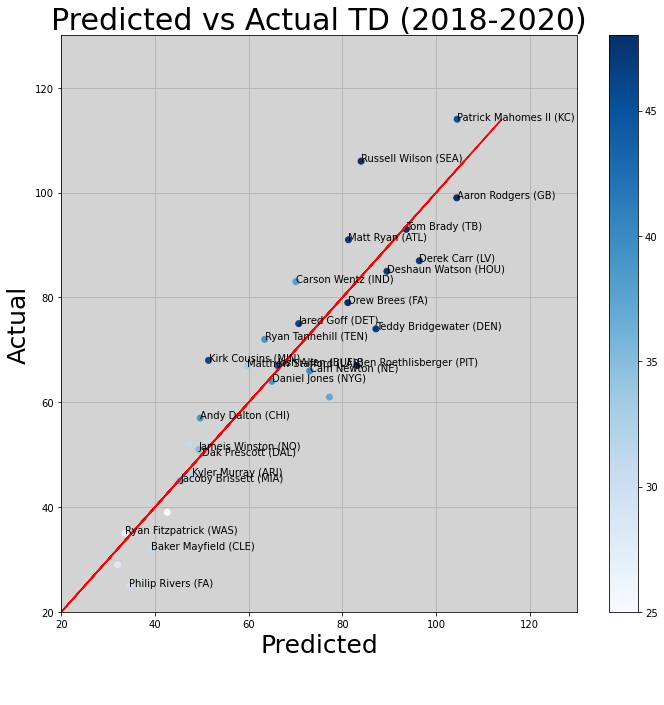

In [22]:
plt.figure(figsize=(10,10))
weight = sub.G
plt.scatter(results.fittedvalues, sub.TDS,marker="o",c= weight,cmap='Blues')

plt.xlim(20,130)
plt.ylim(20,130)
plt.xlabel("Predicted",fontsize=25)
plt.ylabel("Actual",fontsize=25)
plt.title("Predicted vs Actual TD (2018-2020)",fontsize=30)
plt.plot(sub.TDS, sub.TDS,color='red')
plt.tight_layout()
plt.annotate(f'R squared is: {results.rsquared}',(20,120),fontsize=15)
plt.annotate(f'Inputs are {inputs}',(20,45),fontsize=15)
plt.grid()
plt.colorbar()
ax = plt.axes()
ax.set(facecolor='lightgray')

n = sub.Player

for i,txt in enumerate(n):
    try:
        print(sub.Player[i])
        plt.annotate(txt, (results.fittedvalues[i], sub.TDS[i]))
    except:
        print(f'Player #{i} was not added')
plt.tight_layout()
plt.show()